BY: **RIYA JOSHI**

EMAIL: riya.joshi@somaiya.edu

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
df = pd.read_csv('reviews.csv', encoding='latin-1', na_values = 'missing') #importing dataset
df.head() # displaying first five records

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df.shape # in the form of (rows,cols)

(42656, 6)

In [6]:
df.describe() # to display different statistical measures of the dataset

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [7]:
df.info() # to display full summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         40043 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [8]:
# checking for NaN values if any
print(df.isna().sum())

Review_ID               0
Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
dtype: int64


In [9]:
# finding out columns with null values
df.columns[df.isnull().any()].tolist()

['Year_Month']

In [10]:
df.dropna(inplace = True) # drop those columns

In [11]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [12]:
df.drop_duplicates(subset="Review_ID",inplace=True,keep='first') # removing duplicate label from Review_ID column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40023 entries, 0 to 42117
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          40023 non-null  int64 
 1   Rating             40023 non-null  int64 
 2   Year_Month         40023 non-null  object
 3   Reviewer_Location  40023 non-null  object
 4   Review_Text        40023 non-null  object
 5   Branch             40023 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [14]:
# separating year and month from Year_month columns to two separate columns
timeline = df['Year_Month'].str.split('-')
df['Year'] = timeline.str[0]
df['Month'] = timeline.str[1]
df.drop(["Year_Month"], axis = 1, inplace = True)
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


<function matplotlib.pyplot.show>

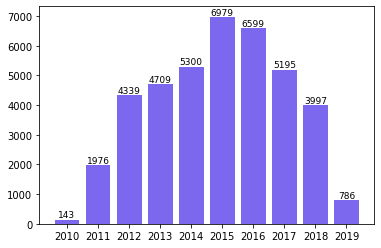

In [15]:
# visualizing Year column

year_viz1 = df.groupby('Year', as_index=False).agg({'Rating':'count'})

x = year_viz1['Year']
y = year_viz1['Rating']

plt.bar(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

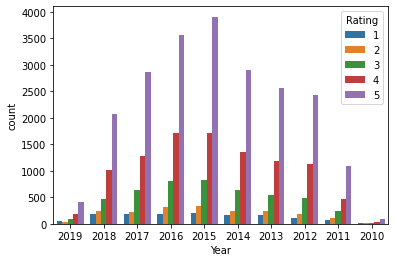

In [16]:
# visualizing Year vs Rating 
sns.countplot(data = df, x = 'Year', hue = 'Rating')

<function matplotlib.pyplot.show>

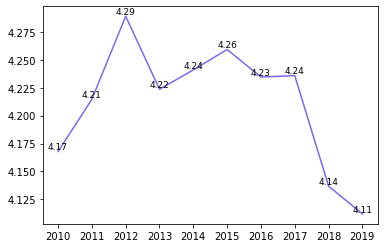

In [17]:
# PLotting the average

year_viz2 = df.groupby('Year', as_index=False).agg({'Rating':'mean'})

x = year_viz2['Year']
y = year_viz2['Rating']

plt.plot(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

<function matplotlib.pyplot.show>

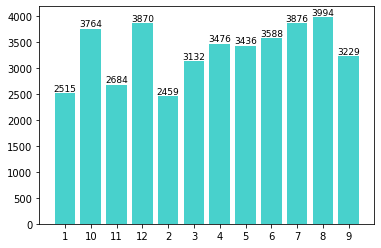

In [18]:
# Visulaization of the month column

month_viz1 = df.groupby('Month', as_index=False).agg({'Rating':'count'})

x = month_viz1['Month']
y = month_viz1['Rating']
plt.bar(x, y, color = 'mediumturquoise')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

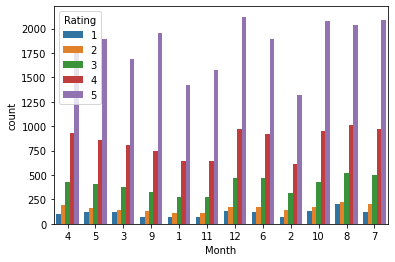

In [19]:
sns.countplot(data = df, x = 'Month', hue = 'Rating')

<function matplotlib.pyplot.show>

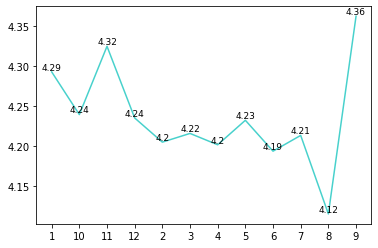

In [20]:
# Plotting the average

month_viz2 = df.groupby('Month', as_index=False).agg({'Rating':'mean'})

x = month_viz2['Month']
y = month_viz2['Rating']

plt.plot(x, y, color = 'mediumturquoise')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

In [21]:
# let's see the name of all the countries included in here

li=list((df['Reviewer_Location'].value_counts()).index)
li

['United States',
 'United Kingdom',
 'Australia',
 'Canada',
 'India',
 'Philippines',
 'Singapore',
 'New Zealand',
 'Malaysia',
 'Hong Kong',
 'Indonesia',
 'Ireland',
 'United Arab Emirates',
 'Netherlands',
 'South Africa',
 'France',
 'Thailand',
 'Germany',
 'China',
 'Spain',
 'Belgium',
 'Switzerland',
 'Italy',
 'Mexico',
 'Saudi Arabia',
 'Israel',
 'Greece',
 'Portugal',
 'Norway',
 'Brazil',
 'Sweden',
 'Romania',
 'Denmark',
 'Malta',
 'Egypt',
 'Qatar',
 'Japan',
 'Finland',
 'Lebanon',
 'Vietnam',
 'Turkey',
 'Cyprus',
 'Kuwait',
 'Russia',
 'Bahrain',
 'South Korea',
 'Macau',
 'Taiwan',
 'Sri Lanka',
 'Austria',
 'Czechia',
 'Mauritius',
 'Iran',
 'Argentina',
 'Poland',
 'Pakistan',
 'Hungary',
 'Oman',
 'Nigeria',
 'Brunei',
 'Chile',
 'Puerto Rico',
 'Bulgaria',
 'Guam',
 'Kenya',
 'Croatia',
 'Jersey',
 'Bangladesh',
 'Peru',
 'Luxembourg',
 'Serbia',
 'Colombia',
 'Estonia',
 'Costa Rica',
 'Slovakia',
 'Isle of Man',
 'Jordan',
 'Guernsey',
 'Ukraine',
 'Guatema

In [22]:
df.reset_index(inplace=True)

In [23]:
df.shape

(40023, 8)

### **Preprocessing 'Review_Text' column and extracting the useful words**

In [24]:
# let's see how a value of column Review_text looks like
df['Review_Text'][5]

"Have been to Disney World, Disneyland Anaheim and Tokyo Disneyland but I feel that Disneyland Hong Kong is really too small to be called a Disneyland. It has way too few rides and attractions. Souvenirs, food and even entrance tickets are slightly more expensive than other Disneyland as well. Basically, this park is good only for small children and people who has never been to Disney. The food choices were acceptable, mostly fast food, and not too expensive. Bottled water, however, was VERY expensive but they do have water fountains around for you to refill your water bottles. The parade was pretty good. It was crowded not a problem but what was the problem was the people were just so rude, the pushing and shoving cutting in lines for the rides, gift shops, food stands was just to much to take. forget trying to see one of the shows its a free for all for seats, i don't see how Disney can let this happen, it was by far the worst managed Disney property."

**Removing the punctuations**

In [25]:
new_review1 = []
for i in range(len(df['Review_Text'])):
    review1=re.sub('[^a-zA-Z]', ' ', df['Review_Text'][i])
    new_review1.append(review1)

In [26]:
new_review1[5]

'Have been to Disney World  Disneyland Anaheim and Tokyo Disneyland but I feel that Disneyland Hong Kong is really too small to be called a Disneyland  It has way too few rides and attractions  Souvenirs  food and even entrance tickets are slightly more expensive than other Disneyland as well  Basically  this park is good only for small children and people who has never been to Disney  The food choices were acceptable  mostly fast food  and not too expensive  Bottled water  however  was VERY expensive but they do have water fountains around for you to refill your water bottles  The parade was pretty good  It was crowded not a problem but what was the problem was the people were just so rude  the pushing and shoving cutting in lines for the rides  gift shops  food stands was just to much to take  forget trying to see one of the shows its a free for all for seats  i don t see how Disney can let this happen  it was by far the worst managed Disney property '

**Removing the spaces**

In [27]:
new_review2 = []
for i in range(len(new_review1)):
    review2=new_review1[i].strip()
    new_review2.append(review2)

In [28]:
new_review2[5]

'Have been to Disney World  Disneyland Anaheim and Tokyo Disneyland but I feel that Disneyland Hong Kong is really too small to be called a Disneyland  It has way too few rides and attractions  Souvenirs  food and even entrance tickets are slightly more expensive than other Disneyland as well  Basically  this park is good only for small children and people who has never been to Disney  The food choices were acceptable  mostly fast food  and not too expensive  Bottled water  however  was VERY expensive but they do have water fountains around for you to refill your water bottles  The parade was pretty good  It was crowded not a problem but what was the problem was the people were just so rude  the pushing and shoving cutting in lines for the rides  gift shops  food stands was just to much to take  forget trying to see one of the shows its a free for all for seats  i don t see how Disney can let this happen  it was by far the worst managed Disney property'

**Setting all words to Lower Case**

In [29]:
new_review3 = []
for i in range(len(new_review2)):
    review3=new_review2[i].lower()
    new_review3.append(review3)

In [30]:
new_review3[5]

'have been to disney world  disneyland anaheim and tokyo disneyland but i feel that disneyland hong kong is really too small to be called a disneyland  it has way too few rides and attractions  souvenirs  food and even entrance tickets are slightly more expensive than other disneyland as well  basically  this park is good only for small children and people who has never been to disney  the food choices were acceptable  mostly fast food  and not too expensive  bottled water  however  was very expensive but they do have water fountains around for you to refill your water bottles  the parade was pretty good  it was crowded not a problem but what was the problem was the people were just so rude  the pushing and shoving cutting in lines for the rides  gift shops  food stands was just to much to take  forget trying to see one of the shows its a free for all for seats  i don t see how disney can let this happen  it was by far the worst managed disney property'

**Removing the stopwords**

In [31]:
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
name = ['disney', 'disneyland', 'iron', 'ironman', 'mickey', 'buz', 'hk', 'california', 'paris', 'hongkong']

new_review4 = []

for i in new_review3:
    sentence = i.split()
    s_p=[]
    for cor in sentence:
        if cor not in stop_words and cor not in punctuation and cor not in name:
            s_p.append(cor)
    s_p=" ".join(s_p)    
    new_review4.append(s_p)

In [32]:
new_review4[5]

'world anaheim tokyo feel hong kong really small called way rides attractions souvenirs food even entrance tickets slightly expensive well basically park good small children people never food choices acceptable mostly fast food expensive bottled water however expensive water fountains around refill water bottles parade pretty good crowded problem problem people rude pushing shoving cutting lines rides gift shops food stands much take forget trying see one shows free seats see let happen far worst managed property'

**Performing stemming on the raw extracted text**

In [33]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    new_review5 = [stemmer.stem(t) for t in new_review4]

In [34]:
new_review5[5]

'world anaheim tokyo feel hong kong really small called way rides attractions souvenirs food even entrance tickets slightly expensive well basically park good small children people never food choices acceptable mostly fast food expensive bottled water however expensive water fountains around refill water bottles parade pretty good crowded problem problem people rude pushing shoving cutting lines rides gift shops food stands much take forget trying see one shows free seats see let happen far worst managed properti'

**Lemmatization of the extracted text**

In [35]:
n=WordNetLemmatizer()
new_review6=[]
for i in range(len(new_review5)):
    words=word_tokenize(new_review5[i])
    lem_word=[]
    for w in words:
        lemm=n.lemmatize(w)
        lem_word.append(lemm)
    ps_tg=pos_tag(lem_word)
    new_review6.append(ps_tg)

In [36]:
new_review6[5]

[('world', 'NN'),
 ('anaheim', 'VBZ'),
 ('tokyo', 'JJ'),
 ('feel', 'NN'),
 ('hong', 'RB'),
 ('kong', 'RB'),
 ('really', 'RB'),
 ('small', 'JJ'),
 ('called', 'VBD'),
 ('way', 'NN'),
 ('ride', 'NN'),
 ('attraction', 'NN'),
 ('souvenir', 'NN'),
 ('food', 'NN'),
 ('even', 'RB'),
 ('entrance', 'NN'),
 ('ticket', 'NN'),
 ('slightly', 'RB'),
 ('expensive', 'JJ'),
 ('well', 'RB'),
 ('basically', 'RB'),
 ('park', 'VB'),
 ('good', 'JJ'),
 ('small', 'JJ'),
 ('child', 'NN'),
 ('people', 'NNS'),
 ('never', 'RB'),
 ('food', 'NN'),
 ('choice', 'NN'),
 ('acceptable', 'JJ'),
 ('mostly', 'RB'),
 ('fast', 'RB'),
 ('food', 'NN'),
 ('expensive', 'JJ'),
 ('bottled', 'VBD'),
 ('water', 'NN'),
 ('however', 'RB'),
 ('expensive', 'JJ'),
 ('water', 'NN'),
 ('fountain', 'NN'),
 ('around', 'IN'),
 ('refill', 'JJ'),
 ('water', 'NN'),
 ('bottle', 'NN'),
 ('parade', 'NN'),
 ('pretty', 'RB'),
 ('good', 'JJ'),
 ('crowded', 'VBN'),
 ('problem', 'NN'),
 ('problem', 'NN'),
 ('people', 'NNS'),
 ('rude', 'VBP'),
 ('pushing'

**Extraction of key concentration phrases**

In [37]:
new_review7=[]
for i in new_review6:
    a=[]
    for j in i:
        if (j[1]=='NN' or j[1]=='NNP' or j[1]=='NNS' or j[1]=='NNPS' or j[1]=='VB'or j[1]=='VBD'or j[1]=='VBG'or j[1]=='VBN'or j[1]=='VBP'or j[1]=='VBZ'or j[1]=='VH'or j[1]=='VHD'or j[1]=='VHG'or j[1]=='VHN'or j[1]=='VHP'or j[1]=='VHZ'or j[1]=='VV'or j[1]=='VVD'or j[1]=='VVG'or j[1]=='VVN'or j[1]=='VVP'or j[1]=='VVZ'or j[1]=='JJ'or j[1]=='JJR'or j[1]=='JJS'or j[1]=='RB'or j[1]=='RBR'or j[1]=='RBS'):
            a.append(j[0])
    new_review7.append(a)

In [38]:
new_review7[5]

['world',
 'anaheim',
 'tokyo',
 'feel',
 'hong',
 'kong',
 'really',
 'small',
 'called',
 'way',
 'ride',
 'attraction',
 'souvenir',
 'food',
 'even',
 'entrance',
 'ticket',
 'slightly',
 'expensive',
 'well',
 'basically',
 'park',
 'good',
 'small',
 'child',
 'people',
 'never',
 'food',
 'choice',
 'acceptable',
 'mostly',
 'fast',
 'food',
 'expensive',
 'bottled',
 'water',
 'however',
 'expensive',
 'water',
 'fountain',
 'refill',
 'water',
 'bottle',
 'parade',
 'pretty',
 'good',
 'crowded',
 'problem',
 'problem',
 'people',
 'rude',
 'pushing',
 'shoving',
 'cutting',
 'line',
 'ride',
 'gift',
 'shop',
 'food',
 'stand',
 'much',
 'take',
 'forget',
 'trying',
 'see',
 'show',
 'free',
 'seat',
 'see',
 'let',
 'happen',
 'far',
 'worst',
 'managed',
 'properti']

**Concatenating these concentration phrases**

In [39]:
text=[]
for i in new_review7 :
    lem_join=" ".join(i)
    text.append(lem_join)

In [40]:
text[5]

'world anaheim tokyo feel hong kong really small called way ride attraction souvenir food even entrance ticket slightly expensive well basically park good small child people never food choice acceptable mostly fast food expensive bottled water however expensive water fountain refill water bottle parade pretty good crowded problem problem people rude pushing shoving cutting line ride gift shop food stand much take forget trying see show free seat see let happen far worst managed properti'

In [41]:
df["Extracted_review"] = text

In [42]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Extracted_review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever anywhere find hong kong similar layout wa...
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,last time visit yet time stay tomorrowland aka...
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise b...
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,great compact park unfortunately quite bit mai...
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took hour kowlon kid much everyt...


### **Preprocessing the 'Branch' column**

In [43]:
df.Branch.nunique()

3

In [44]:
df.Branch.value_counts()

Disneyland_California    18196
Disneyland_Paris         12693
Disneyland_HongKong       9134
Name: Branch, dtype: int64

In [45]:
df['Branch'] = df['Branch'].str.slice(start=11)
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Extracted_review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,last time visit yet time stay tomorrowland aka...
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise b...
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took hour kowlon kid much everyt...


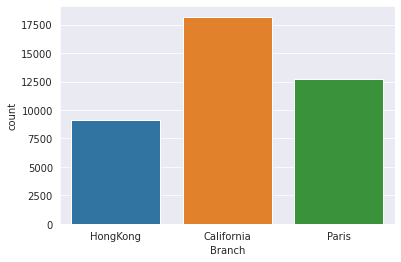

In [46]:
# Visualization of the labels in the 'Branch' column

sns.set_style("darkgrid")
sns.countplot(x="Branch", data=df)

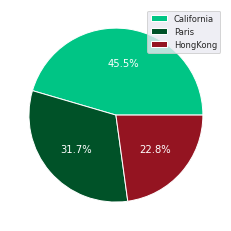

In [47]:
colors = ['#00c585', '#005228',  '#941421', '#ffb500', '#09b9b7' ]
plt.pie(x = df["Branch"].value_counts(),  
        autopct='%1.1f%%', textprops=dict(color='white'), colors = colors)
plt.legend(df["Branch"].value_counts().index, loc='upper right', fontsize = "small")
plt.show()

In [48]:
# Performing One Hot Encoding on the 'Branches' column
location = pd.get_dummies(df['Branch'])
location

,California,HongKong,Paris
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
40018,0,0,1
40019,0,0,1
40020,0,0,1
40021,0,0,1


In [49]:
df = pd.concat([df,location],axis=1)
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Extracted_review,California,HongKong,Paris
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,0,1,0
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,last time visit yet time stay tomorrowland aka...,0,1,0
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise b...,0,1,0
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,0,1,0
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took hour kowlon kid much everyt...,0,1,0


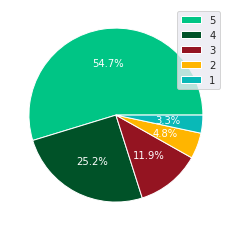

In [50]:
# Visualization and data analysis of the 'Rating' column

colors = ['#00c585', '#005228',  '#941421', '#ffb500', '#09b9b7' ]
ratings = df["Rating"].value_counts()

plt.pie(x = ratings, autopct='%1.1f%%', textprops=dict(color='white'), colors = colors)
plt.legend(labels = ratings.index)

plt.show()


In [54]:
# loading images which are to be used as masks

img1 = np.array(Image.open(r"Images/image_one.png"))
img2 = np.array(Image.open(r"Images/image_two.png"))
img3 = np.array(Image.open(r"Images/image_three.png"))
img4 = np.array(Image.open(r"Images/image_four.png"))
img5 = np.array(Image.open(r"Images/image_five.png"))
california = np.array(Image.open(r"Images/california.png"))
hongkong = np.array(Image.open(r"Images/hongkong.png"))
paris = np.array(Image.open(r"Images/paris.png"))
positive = np.array(Image.open(r"Images/positive.png"))
negative = np.array(Image.open(r"Images/negative.png"))
intermediate = np.array(Image.open(r"Images/intermediate.png"))

**What is a wordcloud ?**

* A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

* Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

**WordCloud of Rating = 1**

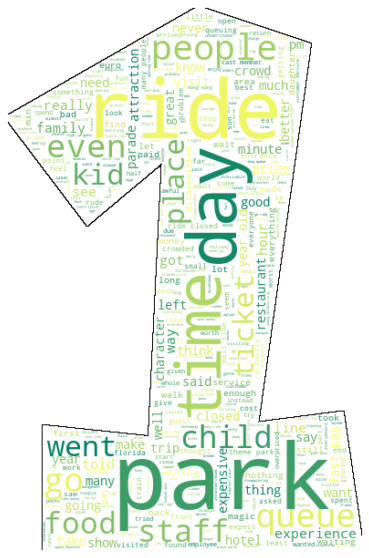

In [55]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img1, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "summer").generate(" ".join(df[df.Rating == 1].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**WordCloud of Rating = 2**

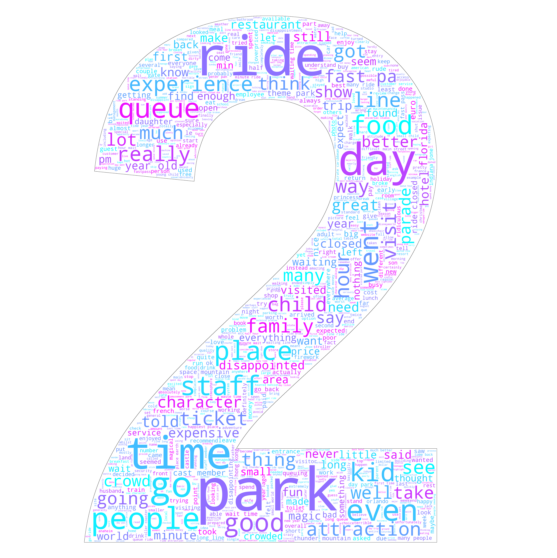

In [56]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img2, background_color='white',
               max_words = 1000 , width = 500 , height = 400,  
               contour_width = 1, contour_color = 'black', colormap = "cool").generate(" ".join(df[df.Rating == 2].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**WordCloud of Rating = 3**

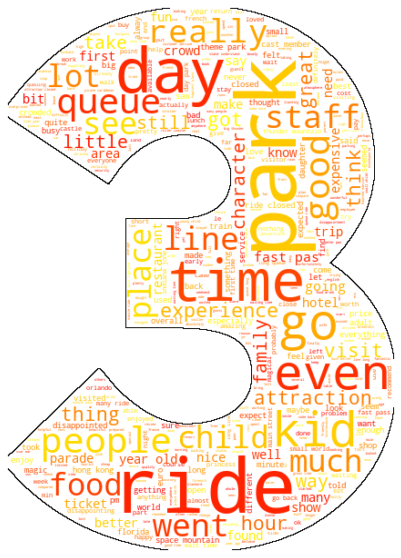

In [57]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img3, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "autumn").generate(" ".join(df[df.Rating == 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**WordCloud of Rating = 4**

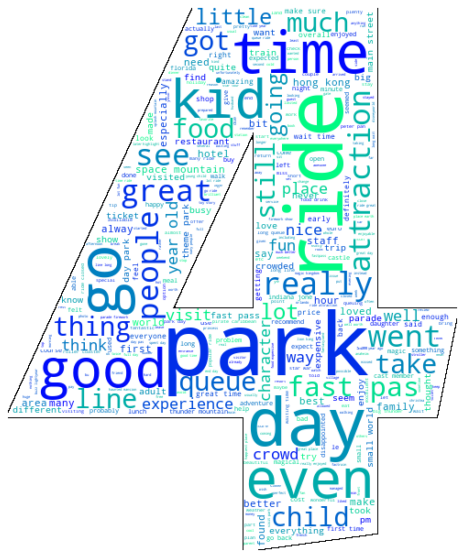

In [58]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img4, background_color='white',
               max_words = 1000 , width = 500 , height = 400,
               contour_width = 1, contour_color = 'black', colormap = "winter").generate(" ".join(df[df.Rating == 4].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**WordCloud of Rating = 5**

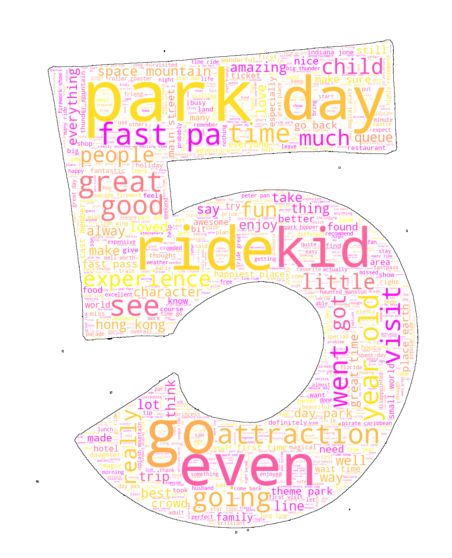

In [59]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img5, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "spring").generate(" ".join(df[df.Rating == 5].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**Visualization of Rating with respect to different Branches of Disneyland**

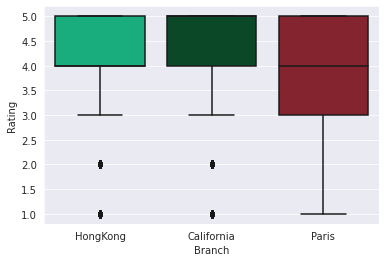

In [60]:
sns.set_palette(colors)
sns.boxplot(y = df['Rating'], x = df['Branch'])

Text(0.5, 1.0, 'Paris')

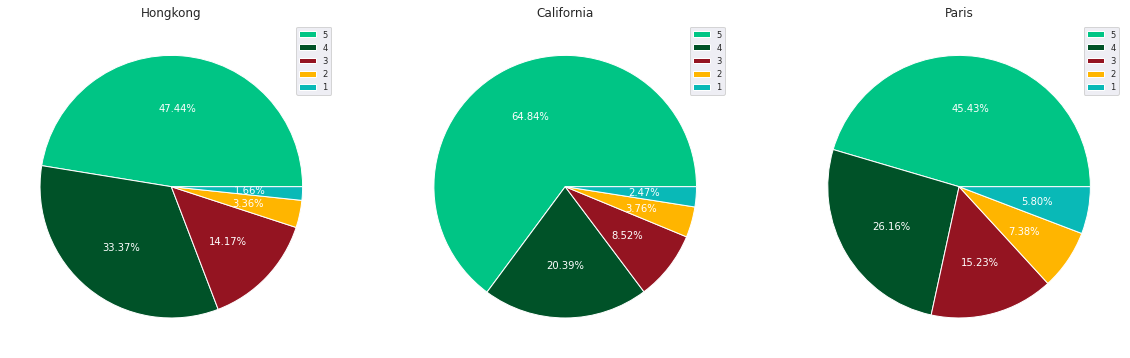

In [61]:
hong = df.loc[df["Branch"] == "HongKong"]
hong_star = hong['Rating'].value_counts()

cal = df.loc[df["Branch"] == "California"]
cal_star = cal['Rating'].value_counts()

par = df.loc[df["Branch"] == "Paris"]
par_star = par['Rating'].value_counts()

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].pie(x = hong_star, labels = hong_star.index, autopct='%1.2f%%', textprops=dict(color='white'), colors = colors)
ax[0].legend(hong_star.index, loc='upper right', fontsize = "small")
ax[0].set_title("Hongkong")

ax[1].pie(x = cal_star, labels = cal_star.index, autopct='%1.2f%%', textprops=dict(color='white'), colors = colors)
ax[1].legend(cal_star.index, loc='upper right', fontsize = "small")
ax[1].set_title("California")

ax[2].pie(x = par_star, labels = par_star.index, autopct='%1.2f%%', textprops=dict(color='white'), colors = colors)
ax[2].legend(par_star.index, loc='upper right', fontsize = "small")
ax[2].set_title("Paris")

**Plotting the average rating in each Branch**

<function matplotlib.pyplot.show>

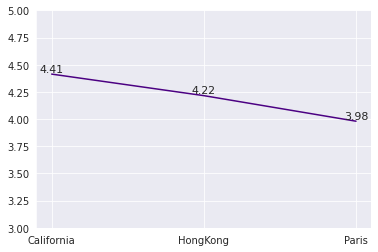

In [62]:
branch_rating = df.groupby('Branch', as_index=False).agg({'Rating':'mean'})

x = branch_rating['Branch']
y = branch_rating['Rating']

plt.plot(x, y, color = 'indigo')
plt.ylim(3,5)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 11,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

In [63]:
branch_rating

,Branch,Rating
0,California,4.413717
1,HongKong,4.215568
2,Paris,3.980462


### **Creating WordClouds of all the Branches**

**WordCloud of 'California' Branch**

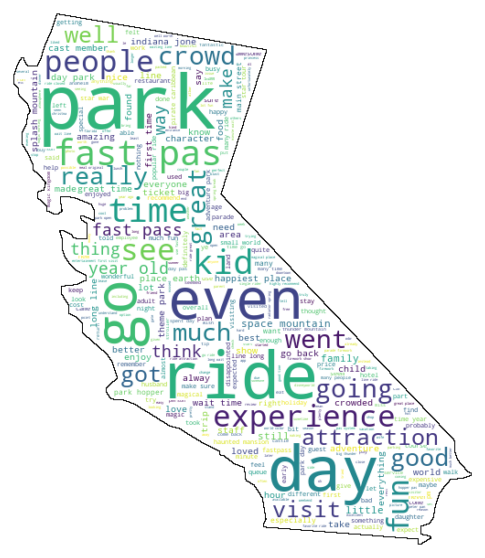

In [64]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = california, background_color='white',
               max_words = 1000 , width = 500 , height = 400,
               contour_width = 1, contour_color = 'black', colormap = "viridis").generate(" ".join(df[df.Branch == 'California'].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**WordCloud of 'HongKong' Branch**

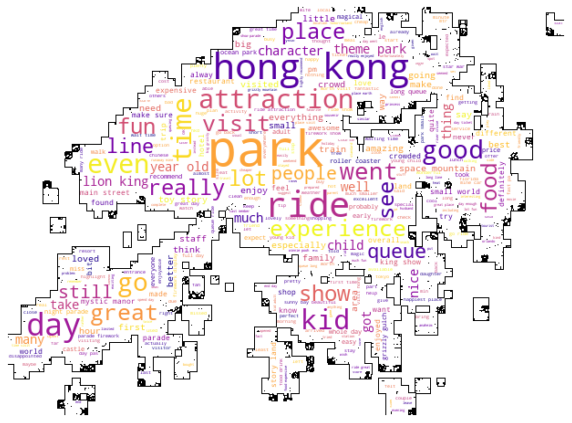

In [65]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = hongkong, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "plasma").generate(" ".join(df[df.Branch == 'HongKong'].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**WordCloud of 'Paris' Branch**

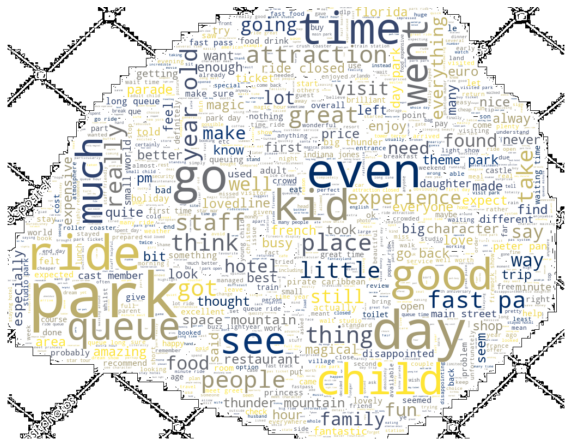

In [66]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = paris, background_color='white',
               max_words = 1000 , width = 500 , height = 400,  
               contour_width = 1, contour_color = 'black', colormap = "cividis").generate(" ".join(df[df.Branch == 'Paris'].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### **Visualization of the Correlation between different Branches and Reviewers Location**

**From here we can analyse people of which countries prefer which Disneyland Branch**

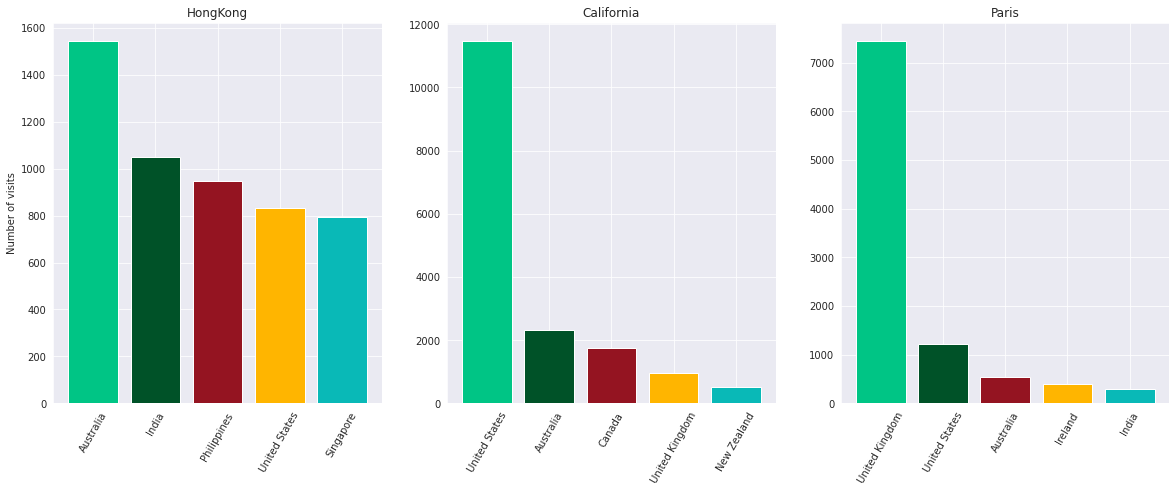

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

hong_loc = df[df["Branch"] == "HongKong"]["Reviewer_Location"].value_counts()[:5]
cal_loc = df.loc[df["Branch"] == "California"]["Reviewer_Location"].value_counts()[:5]
par_loc = df.loc[df["Branch"] == "Paris"]["Reviewer_Location"].value_counts()[:5]

ax[0].bar(hong_loc.index, hong_loc.values, color = colors)
ax[0].set_ylabel('Number of visits')
ax[0].set_title("HongKong")
ax[0].tick_params(axis = 'x', rotation = 60)

ax[1].bar(cal_loc.index, cal_loc.values, color = colors)
ax[1].set_title("California")
ax[1].tick_params(axis = 'x', rotation = 60)

ax[2].bar(par_loc.index, par_loc.values, color = colors)
ax[2].set_title("Paris")
ax[2].tick_params(axis = 'x', rotation = 60)

* HongKong Branch - most visited by people of Australia
* California Branch - most visited by people of United States
* Paris Branch - most visited by people of United Kingdom

# **Sentiment Analysis to predict the sentiment of reviews**

**Sentiment metric**:

If Rating is 5 or 4 --> Positive Sentiment

If Rating is 3 --> Intermediate Sentiment

If Rating is 2 or 1 --> Nagetive Sentiment

### **WordCloud of Positive Sentiments**

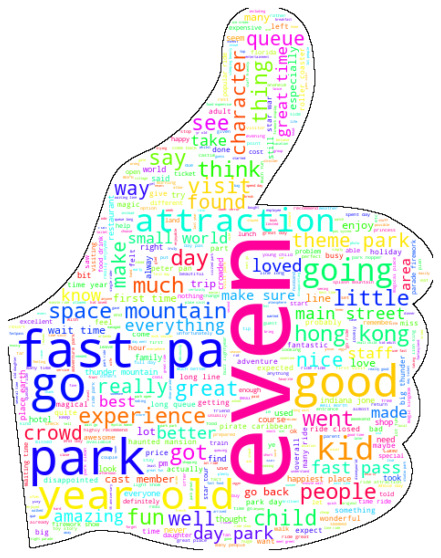

In [68]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = positive, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "hsv").generate(" ".join(df[df.Rating >= 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### **WordCloud of Negative Sentiments**

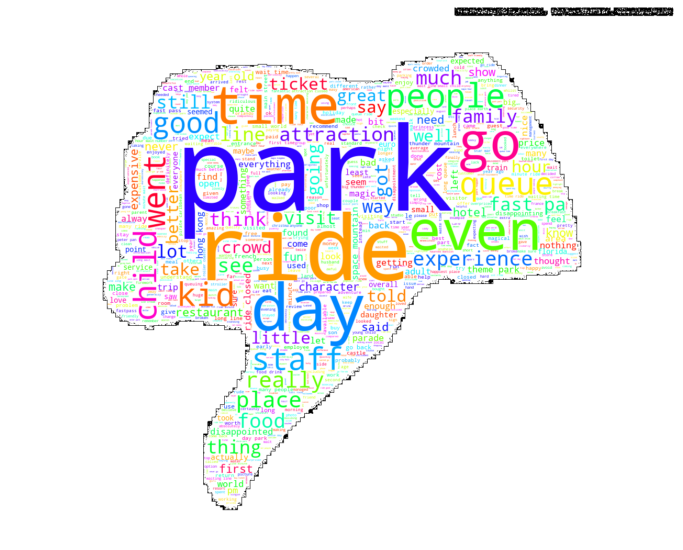

In [69]:
plt.figure(figsize = (12,12))
Wc = WordCloud(mask = negative, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "hsv").generate(" ".join(df[df.Rating <= 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### **WordCloud of Intermediate Sentiments**

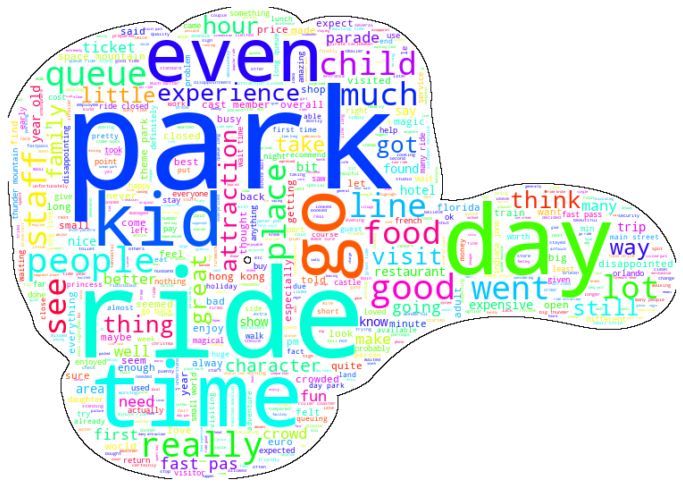

In [70]:
plt.figure(figsize = (12,12))
Wc = WordCloud(mask = intermediate, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "hsv").generate(" ".join(df[df.Rating == 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### **Finding the Sentiment Polarity of the reviews**

In [71]:
S_Polarity = []
for i in df["Rating"]:
    if i > 3:
        S_Polarity.append('positive')
    elif i < 3:
        S_Polarity.append('negative')
    else:
        S_Polarity.append('neutral')

In [72]:
df["S_Polarity"] = S_Polarity

In [73]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Extracted_review,California,HongKong,Paris,S_Polarity
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,0,1,0,positive
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,last time visit yet time stay tomorrowland aka...,0,1,0,positive
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise b...,0,1,0,positive
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,0,1,0,positive
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took hour kowlon kid much everyt...,0,1,0,positive


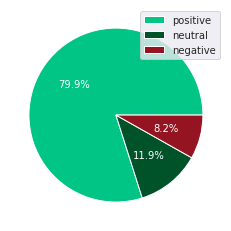

In [74]:
ratings = df["S_Polarity"].value_counts()

plt.pie(x = ratings,
       autopct='%1.1f%%', textprops=dict(color='white'))
plt.legend(labels = ratings.index)

plt.show()

# **Lexicon based approach of Sentiment Analysis**

### **Getting the VADER score**

In [75]:
senti_analyzer=SentimentIntensityAnalyzer()

In [76]:
df['Rating'][7]

3

In [77]:
df['Extracted_review'][7]

'think intro magic little almost attraction completed day drawback timing example storybook theatre closed wed thu private event restaurant close mid week tue thur well best plan visit mid week biggest disappointment food park even maxim decent restaurant main street corner cafe main street bakery prepared typical abrupt style service serving staff'

In [78]:
v_scores = []

for i in df['Extracted_review']:
    score = senti_analyzer.polarity_scores(i)
    v_scores.append(score['compound'])

In [79]:
v_scores[7]

0.7452

In [80]:
df['VADER_score'] = v_scores

**Finding the VADER Polarity**

In [81]:
V_Polarity = []

for i in v_scores:
    if i > 0:
        V_Polarity.append('positive')
    elif i < 0:
        V_Polarity.append('negative')
    else:
        V_Polarity.append('neutral')

In [82]:
V_Polarity[7]

'positive'

In [83]:
df["V_Polarity"] = V_Polarity

In [84]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Extracted_review,California,HongKong,Paris,S_Polarity,VADER_score,V_Polarity
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,0,1,0,positive,0.7070,positive
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,last time visit yet time stay tomorrowland aka...,0,1,0,positive,0.9750,positive
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise b...,0,1,0,positive,0.9852,positive
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,0,1,0,positive,0.6969,positive
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took hour kowlon kid much everyt...,0,1,0,positive,0.2023,positive


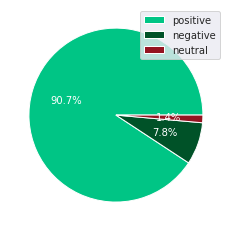

In [85]:
v_pol = df["V_Polarity"].value_counts()

plt.pie(x = v_pol,
       autopct='%1.1f%%', textprops=dict(color='white'))
plt.legend(labels = v_pol.index)

plt.show()

**Preprocessing the Training dataframe**

In [86]:
df.drop(['Branch','index','Review_Text'],axis=1,inplace=True)

In [87]:
df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location     object
Year                  object
Month                 object
Extracted_review      object
California             uint8
HongKong               uint8
Paris                  uint8
S_Polarity            object
VADER_score          float64
V_Polarity            object
dtype: object

**Performing Label Encoding on 'Reviewer Location' , 'Year', 'S_Polarity' and 'V_Polarity' columns**

In [88]:
le = LabelEncoder()

for i in ['Reviewer_Location','Year','S_Polarity','V_Polarity']:
    df[i] = le.fit_transform(df[i])

**Converting the data of 'Month' column into numeric type**

In [89]:
df["Month"] = pd.to_numeric(df["Month"])

In [90]:
df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location      int64
Year                   int64
Month                  int64
Extracted_review      object
California             uint8
HongKong               uint8
Paris                  uint8
S_Polarity             int64
VADER_score          float64
V_Polarity             int64
dtype: object

In [91]:
df.head()

,Review_ID,Rating,Reviewer_Location,Year,Month,Extracted_review,California,HongKong,Paris,S_Polarity,VADER_score,V_Polarity
0,670772142,4,8,9,4,ever anywhere find hong kong similar layout wa...,0,1,0,2,0.7070,2
1,670682799,4,114,9,5,last time visit yet time stay tomorrowland aka...,0,1,0,2,0.9750,2
2,670623270,4,151,9,4,thanks god hot humid visiting park otherwise b...,0,1,0,2,0.9852,2
3,670607911,4,8,9,4,great compact park unfortunately quite bit mai...,0,1,0,2,0.6969,2
4,670607296,4,152,9,4,location city took hour kowlon kid much everyt...,0,1,0,2,0.2023,2


**Review Analysis on the basis of Sentiment Polarity**

In [92]:
X = df['Extracted_review']
X

0        ever anywhere find hong kong similar layout wa...
1        last time visit yet time stay tomorrowland aka...
2        thanks god hot humid visiting park otherwise b...
3        great compact park unfortunately quite bit mai...
4        location city took hour kowlon kid much everyt...
                               ...                        
40018    pick prompt taxi driver wasnt sure time pickin...
40019    returned day family trip boy aged reading prev...
40020    spent dec park lunchtime attraction starting c...
40021    well really looking forward trip christmas per...
40022    staying hotel make good use extra hour fast pa...
Name: Extracted_review, Length: 40023, dtype: object

In [93]:
X.shape

(40023,)

In [94]:
y = df['S_Polarity']
y

0        2
1        2
2        2
3        2
4        2
        ..
40018    2
40019    2
40020    0
40021    0
40022    2
Name: S_Polarity, Length: 40023, dtype: int64

In [95]:
y.shape

(40023,)

**Splitting the data**

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True)

(32018,) (8005,)


(array([0, 1, 2]), array([ 2614,  3822, 25582]))

**Using Tf-IDF Vectorizer**

In [97]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<32018x30246 sparse matrix of type '<class 'numpy.float64'>'
	with 1480018 stored elements in Compressed Sparse Row format>

In [98]:
X_train_vectorized.shape

(32018, 30246)

### **Using Decision Tree classifier**

In [99]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print("Train accuracy: ",dt.score(X_train_vectorized, y_train))
print("Test accuracy: ",dt.score(vect.transform(X_test), y_test))

Train accuracy:  0.9846336435754888
Test accuracy:  0.7597751405371642


### **Using Random Forest classifier**

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print("Train accuracy: ",rf.score(X_train_vectorized, y_train))
print("Test accuracy: ",rf.score(vect.transform(X_test), y_test))

Train accuracy:  0.9587107252170654
Test accuracy:  0.8008744534665834


### **Using XGBoost classifier**

In [101]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 100, random_state = 42)
xgb.fit(X_train_vectorized, y_train)
print("Train accuracy: ",xgb.score(X_train_vectorized, y_train))
print("Test accuracy: ",xgb.score(vect.transform(X_test), y_test))

Train accuracy:  1.0
Test accuracy:  0.8326046221111805


# **Review Analysis on the basis of VADER Polarity**

In [102]:
X = df['Extracted_review']
X.head()

0    ever anywhere find hong kong similar layout wa...
1    last time visit yet time stay tomorrowland aka...
2    thanks god hot humid visiting park otherwise b...
3    great compact park unfortunately quite bit mai...
4    location city took hour kowlon kid much everyt...
Name: Extracted_review, dtype: object

In [103]:
y = df['V_Polarity']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: V_Polarity, dtype: int64

**Using Decision Tree classifier**

In [104]:
dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print("Train accuracy: ",dt.score(X_train_vectorized, y_train))
print("Test accuracy: ",dt.score(vect.transform(X_test), y_test))

Train accuracy:  0.9846336435754888
Test accuracy:  0.7597751405371642


**Using Random Forest classifier**

In [105]:
rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print("Train accuracy: ",rf.score(X_train_vectorized, y_train))
print("Test accuracy: ",rf.score(vect.transform(X_test), y_test))

Train accuracy:  0.9587107252170654
Test accuracy:  0.8008744534665834


**Using XGBoost classifier**

In [106]:
xgb = XGBClassifier(max_depth = 100, random_state = 42)
xgb.fit(X_train_vectorized, y_train)
print("Train accuracy: ",xgb.score(X_train_vectorized, y_train))
print("Test accuracy: ",xgb.score(vect.transform(X_test), y_test))

Train accuracy:  1.0
Test accuracy:  0.8326046221111805


After performing the comparative analysis of different classfier models(Decision Tree,Random Forest, XGBoost), we can conclude that :-
* VADER Polarity is a better metric than Sentiment Polarity to analyse the sentiment of the extracted review texts
* XGBoost perfroms better than the other 2 models both when Sentiment Polarity and VADER Polarity is feeded.